# Title of Project
## Introduction
### The Question:
A research group led by Frank Wood at UBC is collecting data and using it to understand how people play video games, in particular Minecraft. Wood and his team have three broad questions they would like to address:

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Question 2: What "kinds" of players are most likely to contribute to a large amount of data?

Question 3: What time windows are most likely to have large numbers of simultaneous players.

Wood and his team collected two datasets, `players.csv` and `sessions.csv`.

In this project, using the data sets collected from Wood and his team, we will attempt to answer the question:

"Can the age of a player help predict the playing time of users in the `players.csv` dataset?"
### The Dataset:
In the `players.csv` dataset there are 196 observations and 7 different variables.

- `experience`: Indicates the category of skill level

- `subscribe`: Indicates whether a player is subscribed (TRUE) or not (FALSE), a logical value

- `hashed_email`: Indicates the players unique email, character data

- `played_hours`: Indicates number of hours spent playing, a numeric value

- `name`: Indicates the players name, character data

- `gender`: Indicates the players gender identity, a categorical value

- `age`: Indicates the players age in years, a numeric value

There are a few issues with the dataset including:
1. The option for players to report "prefer not to say" for gender. This could cause issues when using gender as a predictive variable as it introduces uncertainty and missing data,
2. NA (missing data) values throughout the columns, this could lead to less accurate predictions, and
3. Disproportionate hours played between experience levels.

Issues regarding the disproportionate hours played could be due to players with greater experience finding less enjoyment in playing the game and thus playing it less during the observational period. The large age range of study participants could also affect the data collected depending on what time of the year the observations took place (e.g. high-school aged participants and older may have other commitments from September-June which could affect their playing hours).

(3) **Exploratory Data Analysis and Visualization**

Attach needed packages

In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Upload Player Data

In [3]:
player_data <- read_csv("https://raw.githubusercontent.com/bellamartens/Individual_Project/refs/heads/main/players.csv")

player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


Wrangle data as needed

In [4]:
player_data <- rename(player_data,
                      hashed_email = hashedEmail,
                      age = Age)
player_data                 

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


Compute average of **quantitative** values

In [5]:
avg_played_hours <- player_data |>
             summarize(avg_played_hours = mean(played_hours, na.rm = TRUE))

avg_age <- player_data |>
                summarize(avg_age = mean(age, na.rm = TRUE))
                       
avg_played_hours
avg_age

avg_played_hours
<dbl>
5.845918


avg_age
<dbl>
20.52062


Report values in a Table

| Average Hours Played | Average Age|
|---|---|
| 6 | 21 |

Visualize the data

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


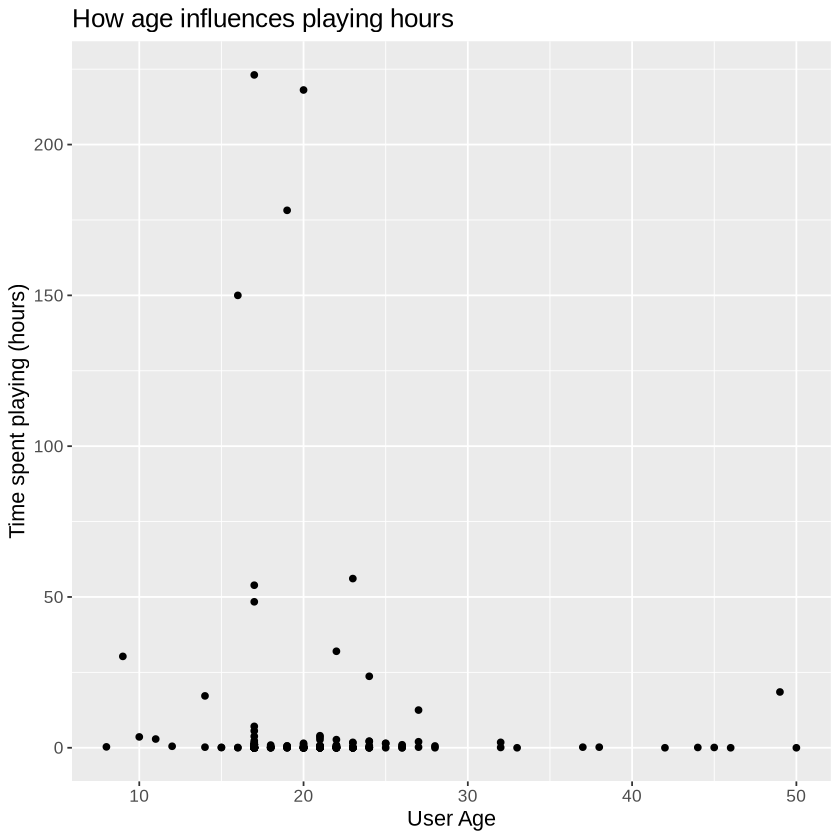

In [6]:
options(repr.plot.width = 7, repr.plot.height = 7) 

plot_1 <- player_data |>
          ggplot(aes(x = age, y = played_hours)) +
          geom_point () +
          labs(x = "User Age", y = "Time spent playing (hours)") +
          ggtitle("How age influences playing hours") +
 theme(text = element_text(size = 13))

plot_1


This scatter plot very loosely shows that ages ranging between 16-22 may have higher playing hours. These are the only ages where there are outliers with very high playing hours (150hrs+). However much of the data doesn't report playing hours for many of the ages, meaning the relationship is unable to be confirmed.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


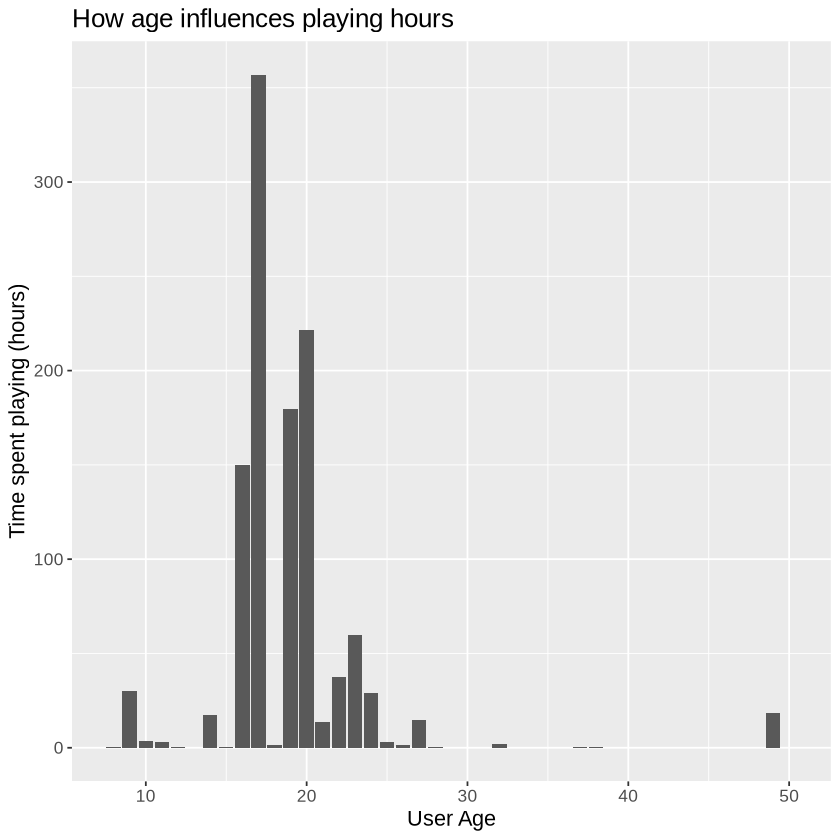

In [7]:
options(repr.plot.width = 7, repr.plot.height = 7) 


plot_2 <- player_data |>
        ggplot(aes(x = age, y = played_hours)) +
        geom_bar(stat = "identity") +
        labs(x = "User Age", y = "Time spent playing (hours)") +
        ggtitle("How age influences playing hours") +      
theme(text = element_text(size = 13))

plot_2
        

From this bar plot, we can clearly see that the ages with the highest playing hours fall between 15-20 years of age. This basic visualization already provides valuable insight into the potential relationship between the two variables by showing that 
younger people spend more time playing.

(4) **Methods and Plan**


The method that will be used to address the question will be K-nearest regression using a KNN model. 
The question is trying to investigate how a players age can predict what their playing hours will be, predicting a numerical 
value requires regression. 

This is an appropriate model to use because the data set is not overly large, we are working with only one predictor, and the range of values inputted in the training data is relatively large. However potential limitations of the model may include sensitivity to outliers which could impact distance calculations. 

The steps to investigate the data will follow the standard process. First, the data will be split into training and testing sets, storing about 80% of the data while testing on 20% of it. The data will be standardized, the model will be trained and the best K value will be chosen through cross-validation. Cross validation will occur by splitting the training data into 5 folds, and then further training and evaluating the model. Once the best K value has been selected the testing data will be evaluated with the chosen K. 

In [ ]:
# analysis code starting here
# data wrangling to remove NAs from the data
set.seed(3000)
player_data <- player_data |>
                filter(age != "NA")

In [ ]:
# splitting the data in a training and testing set
set.seed(3000)
player_split <- initial_split(player_data, prop = 0.75, strata = played_hours)
player_training <- training(player_split)
player_testing <- testing(player_split)

In [ ]:
# setting up the kknn model
set.seed(3000)
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

In [ ]:
# setting up the recipe
set.seed(3000)
player_recipe <- recipe(played_hours ~ age, data = player_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

In [ ]:
# creating the vfold and workflow to begin looking for the best k value to use
set.seed(3000)
player_vfold <- vfold_cv(player_training, v = 5, strata = played_hours)

player_workflow <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(player_spec)

In [ ]:
# getting the metrics to see which k values have the best rmse
set.seed(3000)
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

player_results <- player_workflow |>
  tune_grid(resamples = player_vfold, grid = gridvals) |>
  collect_metrics()

In [ ]:
# filtering for the best k value
set.seed(3000)
player_min <- player_results |>
   filter(.metric == 'rmse') |>
   slice_min(mean)

player_min

In [ ]:
# using the best k value to make the best model and workflow
set.seed(3000)
k_min <- player_min |>
         pull(neighbors)

player_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_min) |>
         set_engine('kknn') |>
         set_mode('regression')

player_best_fit <- workflow() |>
         add_recipe(player_recipe) |>
         add_model(player_best_spec) |>
         fit(data = player_training)

In [ ]:
# getting the summary results of the best model to use for prediction and vizualization
set.seed(3000)
player_summary <- player_best_fit |>
          predict(player_testing) |>
          bind_cols(player_testing) |>
          metrics(truth = played_hours, estimate = .pred)

player_summary

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
31,rmse,standard,20.77371,5,9.648948,Preprocessor1_Model07


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,32.551637
rsq,standard,0.015409
mae,standard,8.783278


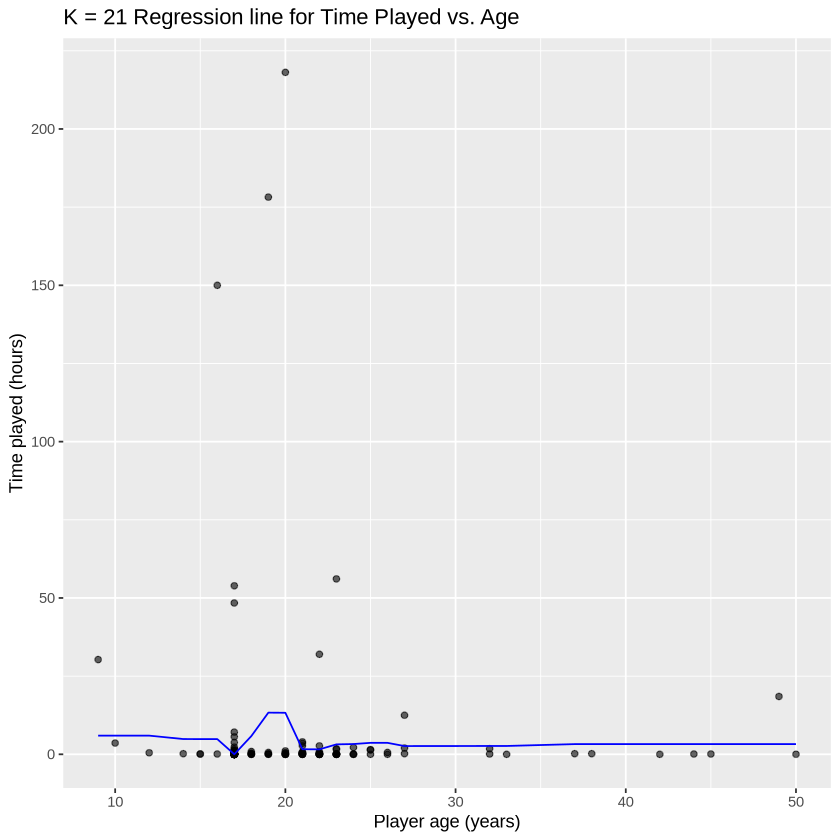

In [ ]:
# creating the vizualization of the best k value regression line
set.seed(3000)
options(repr.plot.width = 7, repr.plot.height = 7)

player_preds <- player_best_fit |>
  predict(player_training) |>
  bind_cols(player_training)

player_plot <- ggplot(player_preds, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  geom_line(data = player_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue") +
              xlab("Player age (years)") +
              ylab("Time played (hours)") +
                ggtitle('K = 21 Regression line for Time Played vs. Age')

player_plot